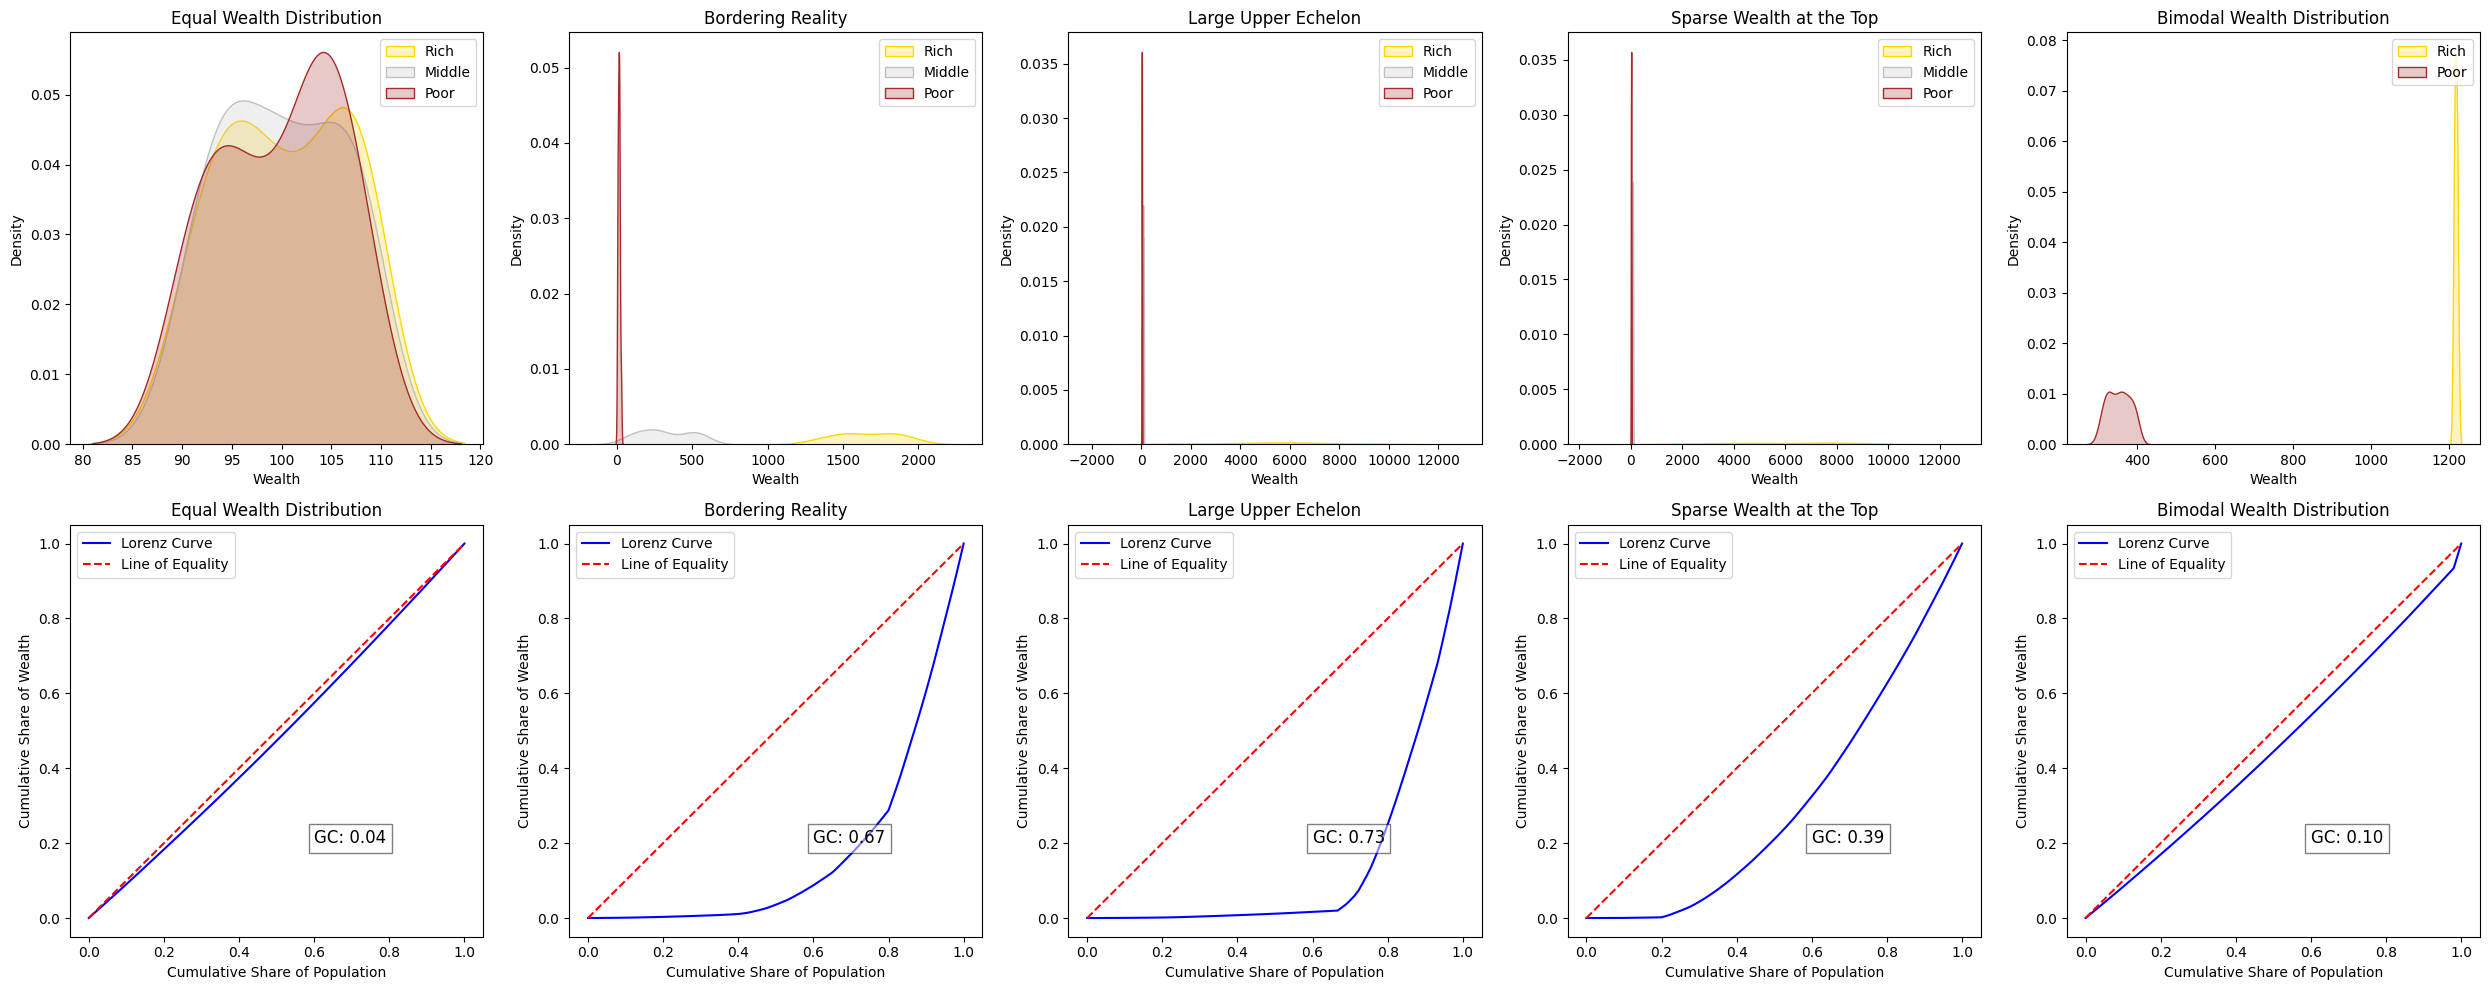

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 5 scenarios
scenarios = [
    # Equal Wealth Distribution
    (np.random.randint(90, 110, 33), np.random.randint(90, 110, 33), np.random.randint(90, 110, 33)),
    
    # Bordering Reality
    (np.random.randint(1200, 2000, 20), np.random.randint(50, 600, 40), np.random.randint(0, 30, 40)),
        
    # Large Upper Echelon
    (np.random.randint(1200, 10000, 30), np.random.randint(50, 100, 40), np.random.randint(0, 30, 20)),
        
    # Sparse Wealth at Large Upper Echelon
    (np.random.randint(1200, 10000, 80), np.random.randint(50, 100, 10), np.random.randint(0, 30, 10)),
        
    # Bimodal Wealth Distribution
    (np.random.randint(1200, 1300, 2), np.random.randint(50, 100, 0), np.random.randint(300, 400, 98))
]

titles = [
    "Equal Wealth Distribution",
    "Bordering Reality",
    "Large Upper Echelon",
    "Sparse Wealth at the Top",
    "Bimodal Wealth Distribution"
]

#Plot
fig, axes = plt.subplots(2, 5, figsize=(25, 10))

for i, (wealth_rich, wealth_middle, wealth_poor) in enumerate(scenarios):
    # LC
    wealth_all = np.concatenate((wealth_rich, wealth_middle, wealth_poor))
    sorted_wealth = np.sort(wealth_all)
    cumulative_wealth = np.cumsum(sorted_wealth)
    normalized_cumulative_wealth = cumulative_wealth / cumulative_wealth[-1]
    lorenz_curve = np.insert(normalized_cumulative_wealth, 0, 0)
    area_under_curve = np.trapz(lorenz_curve, dx=1.0/len(lorenz_curve))
    gini_coefficient = 1 - 2 * area_under_curve

    # Distributions - smooth/kde
    sns.kdeplot(wealth_rich, label='Rich', color='gold', fill=True, ax=axes[0, i])
    sns.kdeplot(wealth_middle, label='Middle', color='silver', fill=True, ax=axes[0, i])
    sns.kdeplot(wealth_poor, label='Poor', color='brown', fill=True, ax=axes[0, i])
    axes[0, i].set_title(f'{titles[i]}')
    axes[0, i].set_xlabel('Wealth')
    axes[0, i].set_ylabel('Density')
    axes[0, i].legend()

    # LC with GC
    axes[1, i].plot(np.linspace(0.0, 1.0, len(lorenz_curve)), lorenz_curve, label="Lorenz Curve", color='blue')
    axes[1, i].plot([0, 1], [0, 1], label="Line of Equality", color='red', linestyle='--')
    axes[1, i].set_title(f'{titles[i]}') #: Lorenz Curve and Gini Coefficient
    axes[1, i].set_xlabel('Cumulative Share of Population')
    axes[1, i].set_ylabel('Cumulative Share of Wealth')
    axes[1, i].text(0.6, 0.2, f'GC: {gini_coefficient:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
    axes[1, i].legend()

plt.tight_layout()
plt.show()